In [1]:
# Importamos las librerías y clases necesarias
import numpy as np
from qiskit.circuit import QuantumRegister, ClassicalRegister,QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.quantum_info import Statevector

# Import para visualización
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

In [2]:
# Definimos un registro cuántico con un qúbit
quantum_reg = QuantumRegister(1) 

# Definimos un registro clásico con un bit
classic_reg = ClassicalRegister(1)

In [3]:
# Importamos el simulador. Con "method" le especificamos el método de simulación
simulador = AerSimulator(method = 'statevector')

In [4]:
#simulador = AerSimulator()
#sim.set_options(method = 'statevector')

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


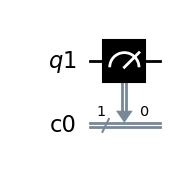

In [5]:
# Creamos el circuito pasandole los registros. 
circuit = QuantumCircuit(quantum_reg, classic_reg)

# Añadimos el medidor
circuit.measure(quantum_reg, classic_reg)
# Lo que le estamos diciendo es que medida los qúbits del "quantum_reg"
# y almacene los resultados de la medida en los bits del "classic_reg"


# Dibujamos el circuito
circuit.draw(output='mpl') # mpl es de Matplolib

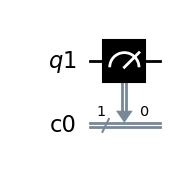

In [6]:
Fig = circuit.draw(output='mpl')
Fig.savefig("Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_1")
Fig

In [7]:
print(circuit.draw(output='text'))

      ┌─┐
  q1: ┤M├
      └╥┘
c0: 1/═╩═
       0 


In [8]:
# transpilamos
t_circuit = transpile(circuit, backend = simulador)

In [9]:
# Ejecutamos la simulación con 1000 shots 
result = simulador.run(t_circuit, shots = 1000).result()
result

Result(backend_name='aer_simulator', backend_version='0.13.2', qobj_id='', job_id='ba72e243-51a7-40e6-beca-b0416cec10cc', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1000}), header=QobjExperimentHeader(creg_sizes=[['c0', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit-158', qreg_sizes=[['q1', 1]], metadata={}), status=DONE, seed_simulator=2888422027, metadata={'time_taken': 0.000530631, 'num_bind_params': 1, 'parallel_state_update': 20, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 1, 'sample_measure_time': 6.3858e-05, 'active_input_qubits': [0], 'num_clbits': 1, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 64112, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}},

In [10]:
counts = result.get_counts()
counts

{'0': 1000}

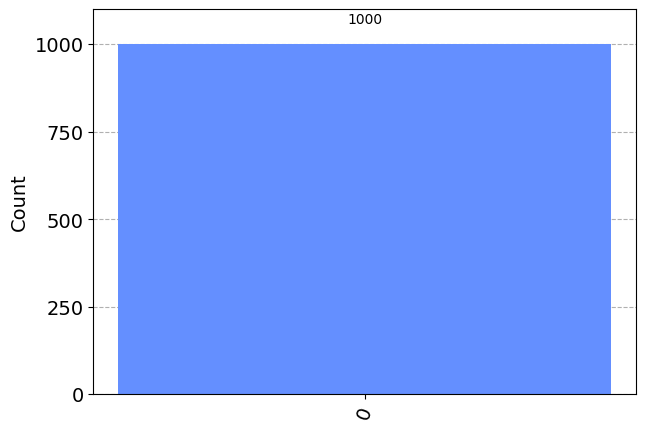

In [11]:
Fig = plot_histogram(counts)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_1_hist')
Fig

      ┌───┐┌─┐
  q1: ┤ X ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0 


/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


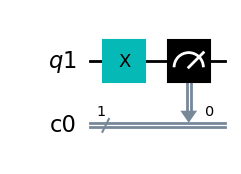

In [12]:
# Creamos el circuito pasandole los registros. 
circuit_X = QuantumCircuit(quantum_reg, classic_reg)

# Añadimos la puerta X al primer (y único) qúbit
circuit_X.x(0)

# Añadimos el medidor
circuit_X.measure(quantum_reg, classic_reg)

# Podemos dibujarlo en modo texto
print(circuit_X.draw(output='text'))

# Podemos dibujarlo como figura de matplolib
Fig = circuit_X.draw(output='mpl') # mpl es de Matplolib
Fig.savefig("Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_X")
Fig

Resultado:  {'1': 1000}


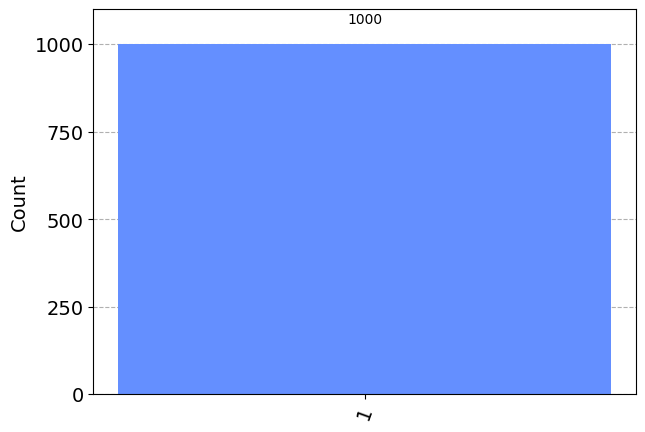

In [13]:
# simulador = AerSimulator(method = 'statevector')
# transpilamos
t_circuit_X = transpile(circuit_X, backend = simulador)

# Ejecutamos
result_X = simulador.run(t_circuit_X, shots = 1000).result()
counts_X = result_X.get_counts()
print("Resultado: ", counts_X)

Fig = plot_histogram(counts_X)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_X_hist')
Fig

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


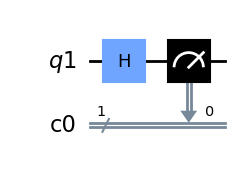

In [14]:
# Creamos el circuito pasandole los registros. 
circuit_H = QuantumCircuit(quantum_reg, classic_reg)

# Añadimos la puerta X al primer (y único) qúbit
circuit_H.h(0)

# Añadimos el medidor
circuit_H.measure(quantum_reg, classic_reg)

# Podemos dibujarlo en modo texto
#print(circuit_H.draw(output='text'))

# Podemos dibujarlo como figura de matplolib
Fig = circuit_H.draw(output='mpl') # mpl es de Matplolib
Fig.savefig("Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_H")
Fig

Resultado:  {'1': 504, '0': 496}


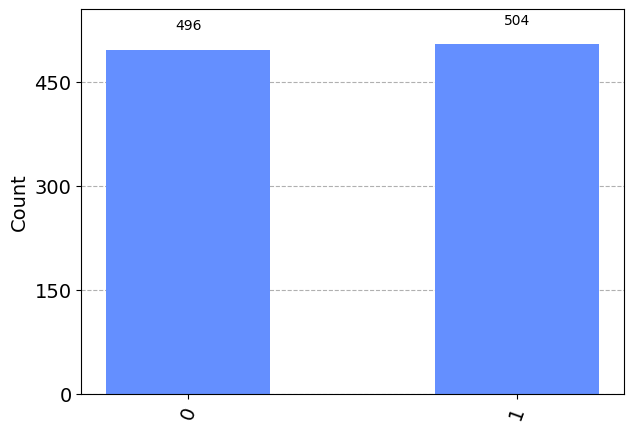

In [15]:
# simulador = AerSimulator(method = 'statevector')
# transpilamos
t_circuit_H = transpile(circuit_H, backend = simulador)

# Ejecutamos
result_H = simulador.run(t_circuit_H, shots = 1000).result()
counts_H = result_H.get_counts()
print("Resultado: ", counts_H)

Fig = plot_histogram(counts_H)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_H_hist')
Fig

In [16]:
circuit_state = QuantumCircuit(quantum_reg, classic_reg)

# inicializamos un estado arbitrario en la esfera de Bloch
theta = 0.5  #rad
phi   = 0.3  #rad
psi_state = [np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]

# Veamos el vector de estado
statevector_plus = Statevector(psi_state)
statevector_plus.draw('latex')

<IPython.core.display.Latex object>

In [17]:
print('p_0=', np.round(np.abs(psi_state[0])**2,3),', p_1=', np.round(np.abs(psi_state[1])**2,3))

p_0= 0.939 , p_1= 0.061


In [18]:
# inicializamos el estado de entrada  
circuit_state.initialize(psi_state,0)
circuit_state.measure(quantum_reg, classic_reg)

Resultado:  {'0': 93885, '1': 6115}


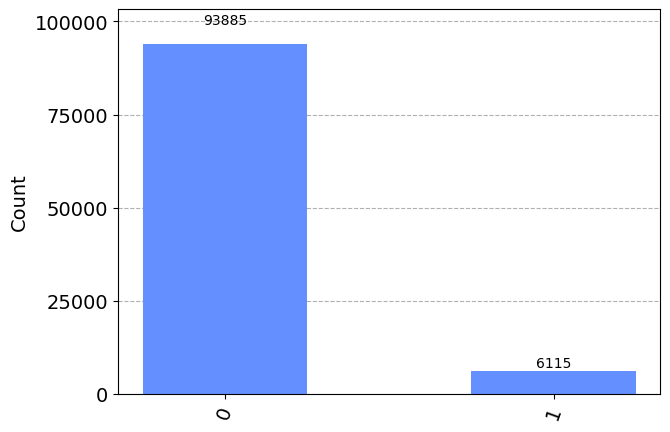

In [19]:
# simulador = AerSimulator(method = 'statevector')
# transpilamos
t_circuit_state = transpile(circuit_state, backend = simulador)

# Ejecutamos
result_state = simulador.run(t_circuit_state, shots = 100000).result()
counts_state = result_state.get_counts()
print("Resultado: ", counts_state)

Fig = plot_histogram(counts_state)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_state_hist')
Fig

In [20]:
def get_prob_dist(counts): # counts es un diccionario 
    N=sum([n for n in counts.values()]) # numero de shots
    prob_dist = {bit:np.round(v/N,4) for bit,v in counts.items()} # this is a modified dictionary
    if len(prob_dist) == 1:  # we are two amplitudes (one qubit), so in this case, pad with a 0
        prob_dist.append(0)
    return prob_dist

prob_distr_state = get_prob_dist(counts_state)
print("probability distribution =", prob_distr_state)

probability distribution = {'0': 0.9388, '1': 0.0612}


In [21]:
from qiskit_ibm_provider import IBMProvider
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor


# Save account credentials.
#IBMProvider.save_account(token=MY_API_TOKEN)

# Load a previously saved account.
provider = IBMProvider()

# Select a different hub/group/project.
provider = IBMProvider(instance="ibm-q/open/main")

ModuleNotFoundError: No module named 'qiskit.providers.ibmq'

In [22]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_circuit_H = transpile(circuit_H, backend, optimization_level=3)
job = backend.run(t_circuit_H, shots = 1000)
job_id = job.job_id()
print(job_id)


NameError: name 'least_busy' is not defined

In [23]:
job.status()

NameError: name 'job' is not defined

In [24]:
#job_monitor(job, interval = 1, line_discipline = '\n') 

In [25]:
backend

NameError: name 'backend' is not defined

In [26]:
result_IBM = job.result()
counts_IBM = result_IBM.get_counts()
counts_IBM

NameError: name 'job' is not defined

In [27]:
job_id="cjrjkq4ieg62g9od3jk0"
retrieve_job = provider.retrieve_job(job_id)
retrieve_job.status()

NameError: name 'provider' is not defined

In [28]:
result_ret = retrieve_job.result()
counts_ret = result_ret.get_counts()
counts_ret

NameError: name 'retrieve_job' is not defined

In [29]:
Fig = plot_histogram(counts_ret)
Fig

NameError: name 'counts_ret' is not defined

In [30]:
classic_reg_2_bits = ClassicalRegister(2)

circuit_coin_1 = QuantumCircuit(quantum_reg, classic_reg_2_bits)
circuit_coin_1.h(0)
circuit_coin_1.measure(quantum_reg, classic_reg_2_bits[0]) # Añadimos una medida intermedia.
circuit_coin_1.h(0)
circuit_coin_1.measure(quantum_reg, classic_reg_2_bits[1])

circuit_coin_2 = QuantumCircuit(quantum_reg, classic_reg)
circuit_coin_2.h(0)
circuit_coin_2.h(0)
circuit_coin_2.measure(quantum_reg, classic_reg)



/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


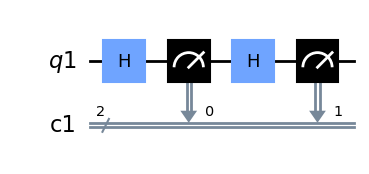

In [31]:
Fig_coin_1 = circuit_coin_1.draw(output='mpl') # mpl es de Matplolib
Fig_coin_1.savefig("Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_coin_1")
Fig_coin_1

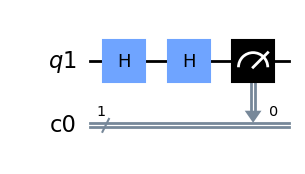

In [32]:
Fig_coin_2 = circuit_coin_2.draw(output='mpl') # mpl es de Matplolib
Fig_coin_2.savefig("Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_coin_1")
Fig_coin_2

In [33]:
# transpilamos
t_circuit_coin_1 = transpile(circuit_coin_1, backend = simulador)
t_circuit_coin_2 = transpile(circuit_coin_2, backend = simulador)

# Ejecutamos
result_coin_1 = simulador.run(t_circuit_coin_1, shots = 1000).result()
counts_coin_1 = result_coin_1.get_counts()
print("Resultado: ", counts_coin_1)

result_coin_2 = simulador.run(t_circuit_coin_2, shots = 1000).result()
counts_coin_2 = result_coin_2.get_counts()
print("Resultado: ", counts_coin_2)

Resultado:  {'01': 238, '11': 271, '00': 233, '10': 258}
Resultado:  {'0': 1000}


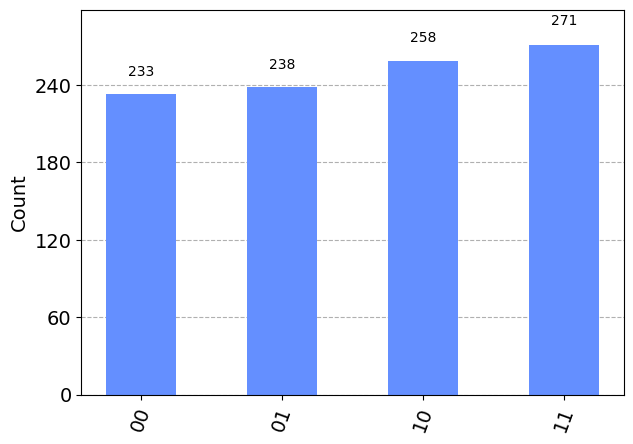

In [34]:
Fig = plot_histogram(counts_coin_1)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_coin_1_hist')
Fig

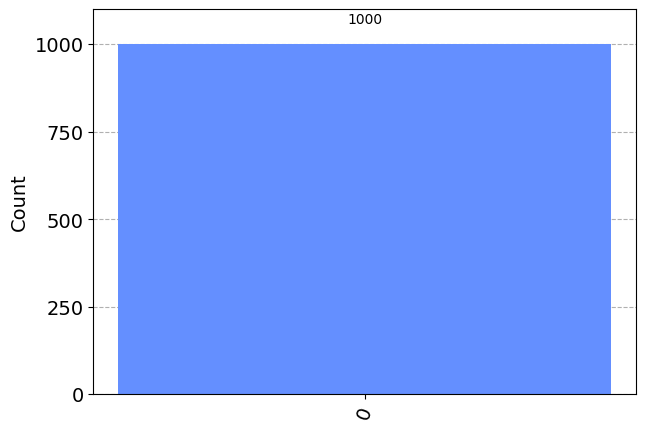

In [35]:
Fig = plot_histogram(counts_coin_2)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_coin_2_hist')
Fig

In [36]:
statevector_plus.draw('latex')

<IPython.core.display.Latex object>

In [37]:
print('p_0=', np.round(np.abs(psi_state[0])**2,3),', p_1=', np.round(np.abs(psi_state[1])**2,3))
print("probability distribution =", prob_distr_state)

p_0= 0.939 , p_1= 0.061
probability distribution = {'0': 0.9388, '1': 0.0612}


In [38]:
# Circuito
circuit_Z_mean = QuantumCircuit(quantum_reg, classic_reg)
circuit_Z_mean.initialize(psi_state,0)
circuit_Z_mean.measure(quantum_reg, classic_reg)

# Transpilamos
t_circuit_Z_mean = transpile(circuit_Z_mean, backend = simulador)

# Ejecutamos
result_Z_mean = simulador.run(t_circuit_Z_mean, shots = 100000).result()
counts_Z_mean = result_Z_mean.get_counts()
print("Resultado: ", counts_Z_mean)

# Distribución de probabilidad
prob_distr_Z_mean = get_prob_dist(counts_Z_mean)
print("probability distribution =", prob_distr_Z_mean)

# Calculamos <Z>
mean_Z = 0

for bits, probs  in prob_distr_Z_mean.items():
    mean_Z += (-1)**(int(bits)) * probs  

print('<Z> =',np.round(mean_Z,5))

Resultado:  {'1': 6249, '0': 93751}
probability distribution = {'1': 0.0625, '0': 0.9375}
<Z> = 0.875


In [39]:
# Circuito
circuit_X_mean = QuantumCircuit(quantum_reg, classic_reg)
circuit_X_mean.initialize(psi_state,0)
circuit_X_mean.h(quantum_reg)
circuit_X_mean.measure(quantum_reg, classic_reg)

# Transpilamos
t_circuit_X_mean = transpile(circuit_X_mean, backend = simulador)

# Ejecutamos
result_X_mean = simulador.run(t_circuit_X_mean, shots = 100000).result()
counts_X_mean = result_X_mean.get_counts()
print("Resultado: ", counts_X_mean)

# Distribución de probabilidad
prob_distr_X_mean = get_prob_dist(counts_X_mean)
print("probability distribution =", prob_distr_X_mean)

# Calculamos <X>
mean_X = 0

for bits, probs  in prob_distr_X_mean.items():
    mean_X += (-1)**(int(bits)) * probs  

print('<X> =',np.round(mean_X,5))

Resultado:  {'1': 26969, '0': 73031}
probability distribution = {'1': 0.2697, '0': 0.7303}
<X> = 0.4606


In [40]:
# Circuito
circuit_Y_mean = QuantumCircuit(quantum_reg, classic_reg)
circuit_Y_mean.initialize(psi_state,0)
circuit_Y_mean.sdg(quantum_reg)
circuit_Y_mean.h(quantum_reg)
circuit_Y_mean.measure(quantum_reg, classic_reg)

# Transpilamos
t_circuit_Y_mean = transpile(circuit_Y_mean, backend = simulador)

# Ejecutamos
result_Y_mean = simulador.run(t_circuit_Y_mean, shots = 100000).result()
counts_Y_mean = result_Y_mean.get_counts()
print("Resultado: ", counts_Y_mean)

# Distribución de probabilidad
prob_distr_Y_mean = get_prob_dist(counts_Y_mean)
print("probability distribution =", prob_distr_Y_mean)

# Calculamos <Y>
mean_Y = 0

for bits, probs  in prob_distr_Y_mean.items():
    mean_Y += (-1)**(int(bits)) * probs  

print('<Y> =',np.round(mean_Y,5))

Resultado:  {'0': 56902, '1': 43098}
probability distribution = {'0': 0.569, '1': 0.431}
<Y> = 0.138


In [41]:
from qiskit.circuit.library import U3Gate

circuit_V_mean = QuantumCircuit(quantum_reg, classic_reg)

theta_U  = np.pi/6
phi_U    = np.pi/2
varphi_U = np.pi

theta_V  = np.pi/2
phi_V    = np.pi/3
varphi_V = 2*np.pi/7

U        = U3Gate(theta_U, phi_U, varphi_U)
U_dagger = U3Gate(theta_U, phi_U, varphi_U).inverse()
V        = U3Gate(theta_V, phi_V, varphi_V)

circuit_V_mean.append(U, quantum_reg)
circuit_V_mean.append(V, quantum_reg)
circuit_V_mean.append(U_dagger, quantum_reg)
circuit_V_mean.measure(quantum_reg, classic_reg)

# Transpilamos
t_circuit_V_mean = transpile(circuit_V_mean, backend = simulador)

# Ejecutamos
shots = 50000
result_V_mean = simulador.run(t_circuit_V_mean, shots = shots).result()
counts_V_mean = result_V_mean.get_counts()
print("Resultado: ", counts_V_mean)

# Media
print(" <V> = ", counts_V_mean['0']/shots)

Resultado:  {'1': 5297, '0': 44703}
 <V> =  0.89406
